In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [3]:
# import nSimplices 
exec(compile(open(r"nSimplices_final.py", encoding="utf8").read(), "nSimplices_final.py", 'exec'))

# set matplotlib default savefig directory
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above

In [ ]:
### test data, read in a dataset of main dimension 2
data = pd.read_csv(r'datasets/bdd_synthetic_rdim2.csv',sep=';',header=None)
data.head()

In [66]:
### Processing datasets and computing pairwise distances
X=data
X.head()
tab=data
D=pdist(tab.copy()) # compute pairwise distance in data
D_TRUE=squareform(D) # true pairwise distance in squared form

In [67]:
### Add outliers
proportion=0.05
N=tab.shape[0]
k=int(np.ceil(proportion*N))
# random draw of outliers 
indices=np.sort(alea.sample(range(N),k))
for n in indices:
    horsplan=alea.uniform(-100,100)
    # for each row, add outliers to the 3-7 dimension
    i=alea.randint(2,6)
    tab.loc[n,2] = horsplan
print(tab)

            0          1         2         3          4         5         6
0    3.293901  12.210740 -0.000137  2.944050   9.936725  0.034665  2.004415
1    3.996557  24.732818 -0.000090  2.943247   9.991756 -0.006568  1.856705
2    1.472966   8.120509  0.000087  3.126671  10.256404  0.023691  2.019574
3    1.609483  15.557600 -0.000039  2.918684  10.123666 -0.022962  2.067711
4   -0.051618  14.014929 -0.000090  3.065950  10.110528  0.032691  1.992638
..        ...        ...       ...       ...        ...       ...       ...
195  1.676070   6.592703 -0.000046  3.278791   9.905514 -0.007744  2.131531
196 -0.266071  16.758037 -0.000103  3.201915  10.033085  0.052671  1.905793
197  1.878305  21.823800  0.000068  3.041033  10.239035 -0.080791  1.970866
198  2.231732   5.840871 -0.000019  2.940789  10.098893  0.024237  2.165746
199 -2.928105  15.907499 -0.000020  3.086941   9.817352 -0.028754  1.996973

[200 rows x 7 columns]


In [68]:

### Preparing pairwise distances

""" euclidean distances """
N=tab.shape[0] # number of rows 
D=pdist(tab) # pairwise distance in tab (with outliers added)
DSO=squareform(D) # squared matrix form of D

In [71]:

### Run nSimplices method
d=20
T1=time.time()
dico_outlier,rdim,coor_dis,coor_coord = nSimplices(DSO,d,n0=1,nf=13)
T2=time.time()
print(T2-T1)

6.444565392607963
correction of outliers
[[-0.26167365 -0.08351472 -0.14893041  0.31486183 -0.17991114  0.05219106
   0.20842349 -0.07627608 -0.34044979  0.03292418 -0.21039728 -0.25351974
  -0.40088709  0.186849    0.1506781   0.44142297  0.15194314 -0.19631063
   0.01451786 -0.13541722]
 [ 0.31057049  0.14137211 -0.4952567   0.22027071 -0.05179589 -0.23931493
   0.193455   -0.23580285 -0.09474339 -0.18459943  0.09038208  0.23373247
   0.31653943 -0.18745753  0.38560657  0.01041319  0.04687324 -0.20491215
  -0.05089087  0.00343883]
 [-0.26188542 -0.28329055 -0.44767036 -0.18289808  0.06035113 -0.03212469
   0.0008168   0.21306252  0.26265783  0.02946259 -0.19883954  0.26679453
  -0.1403106  -0.25337825 -0.02587268  0.0381922  -0.22742169 -0.04997412
   0.40654348 -0.2848623 ]
 [-0.03646973  0.54206057 -0.11145074  0.06839597  0.2862594   0.2949356
   0.32144456 -0.01212107 -0.057206    0.18397222  0.07499385 -0.22160365
   0.10577165  0.10191118  0.0263768   0.00066363 -0.45179     0.

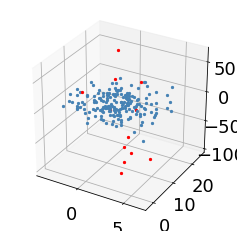

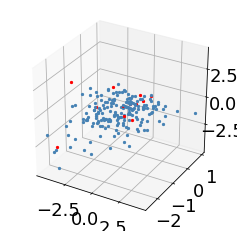

In [87]:
### Section 2.1.2
### Plot in 3D using the first three dimensions - Fig.3(A) 
# (TODO: not exactly the same as in the manuscript)
# (TODO: combine two subfigures into one row)

outlier_list=dico_outlier # list of outliers
normal_list=[i for i in range(200) if i not in outlier_list] # list of normal points 
tab = data
ori_coord=np.array(tab)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

# plot the original coordinates

for i in range(200):
    e=ori_coord[i]
    if (i in outlier_list):
        
        ax.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax.scatter(e[0],e[1],e[2], s=5, color='steelblue')
plt.show()

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

# plot the original coordinates

for i in range(200):
    e=coor_coord[i]
    if (i in outlier_list):
        ax.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax.scatter(e[0],e[1],e[2], s=5, color='steelblue')
plt.show()



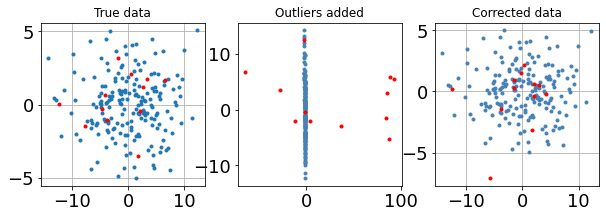

In [88]:
### Section 2.1.2
### Plot in 2D using the two largest eigenvalues - Fig.3(B) 

outlier_list=dico_outlier # list of outliers
normal_list=[i for i in range(200) if i not in outlier_list] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(D_TRUE)
ax1.plot(Xe[normal_list,0],Xe[normal_list,1],'.')
ax1.plot(Xe[outlier_list,0],Xe[outlier_list,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(DSO)
ax2.plot(Xe[normal_list,0],Xe[normal_list,1],'.', color='steelblue')
ax2.plot(Xe[outlier_list,0],Xe[outlier_list,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = cMDS(coor_dis)   
ax3.plot(Xe[normal_list,0],Xe[normal_list,1],'.', color='steelblue')
ax3.plot(Xe[outlier_list,0],Xe[outlier_list,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

In [13]:
### Prepare for section 2.1.3

### test data, read in a dataset of main dimension 10
data = pd.read_csv(r'datasets/bdd_synthetic_rdim10.csv',sep=';',header=None)
data.head()
X=data
X.head()
tab=data
D=pdist(tab.copy())
D_TRUE=squareform(D)

In [14]:
### Add outliers

proportion=0.05
N=tab.shape[0]
k=int(np.ceil(proportion*N))
# random draw of outliers 
indices=np.sort(alea.sample(range(N),k))
for n in indices:
    horsplan=alea.uniform(-50,50)
    
    # for each row, add outliers to one of columns 10 to 15 (inclusive)
    # columns 10 to 15 are originally simulated with Guassian(2, 0.05)
    i=alea.randint(10,15)
    tab.loc[n,i] = horsplan

In [15]:
### Preparing pairwise distances

""" euclidean distances """
N=tab.shape[0]
D=pdist(tab)
DSO=squareform(D)


In [16]:
### Run nSimplices method
d=20
T1=time.time()
dico_outlier,rdim,coor_dis,coor_coord = nSimplices(DSO,d,n0=1,nf=13)
T2=time.time()
print(T2-T1)

22.55273899215529
correction of outliers
[[-0.04450665  0.01290779 -0.27527582 -0.28091668 -0.43360048 -0.01186191
   0.05102836  0.04565657  0.10769398  0.40783638 -0.15949038  0.22219026
  -0.24711919  0.30226613 -0.00988085  0.21452119 -0.11409114  0.19449877
  -0.38420726 -0.02403001]
 [-0.14106754 -0.132319   -0.06580454 -0.20301173  0.17498587 -0.16327742
  -0.14481043 -0.17432586 -0.28686729 -0.11004912 -0.0093664  -0.27028663
   0.14160142  0.03283056 -0.0325485  -0.17083648 -0.44181115  0.55654105
  -0.13744713  0.25624636]
 [ 0.09742671 -0.10140773 -0.55902456  0.06661766  0.19697171  0.43274871
   0.15353673  0.13922944 -0.04640249 -0.01086259 -0.08217741  0.15872939
  -0.21286308 -0.3761671   0.14363509  0.01808403  0.07804431  0.2863132
   0.19912188  0.15666845]
 [-0.12311911 -0.01491423  0.21921519  0.17450865 -0.0781971   0.40246222
   0.22809733 -0.29722393 -0.06480641  0.01167281 -0.248552   -0.23752704
  -0.08112284 -0.01212523 -0.57808288  0.03823795  0.23937516  0.

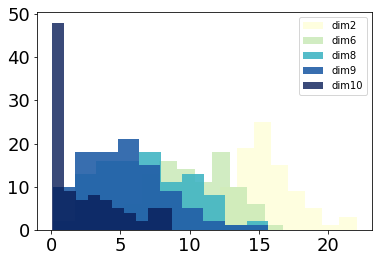

In [17]:
### Importance of dimension correction in higher dimension - Fig.4(A) height distribution 
# (TODO: not exactly the same as in the manuscript)
N=200
B=100

hcolls = []
start_dim = 2
end_dim = 15
for dim in range(start_dim, end_dim+1):
    _, hcoll = DrawNSimplices(DSO,N,B,0,dim)
    hcolls.append(hcoll)


blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
# select a few dimensions (i.e. 2,6,8,9,10) for demonstrating the distributions of heights
plt.hist(hcolls[2-start_dim],label='dim2',color=blues[0])
plt.hist(hcolls[6-start_dim],label='dim6',color=blues[1])
plt.hist(hcolls[8-start_dim],label='dim8',color=blues[2])
plt.hist(hcolls[9-start_dim],label='dim9',color=blues[3])
plt.hist(hcolls[10-start_dim],label='dim10',color=blues[4])
plt.legend()
plt.show()


dim 3 ratio is: 1.113318420192714 14.95460493246894 13.43245980775232
dim 4 ratio is: 1.0934226898998345 13.43245980775232 12.284782391869728
dim 5 ratio is: 1.1423445343969876 12.284782391869728 10.754008113983343
dim 6 ratio is: 1.0710710981356164 10.754008113983343 10.040424144300546
dim 7 ratio is: 1.1022874954067594 10.040424144300546 9.108716361329574
dim 8 ratio is: 1.3571425761543585 9.108716361329574 6.711687129542657
dim 9 ratio is: 1.3243207936778443 6.711687129542657 5.0680221601771125
dim 10 ratio is: 4.566599711311543 5.0680221601771125 1.1098021461402754
dim 11 ratio is: 5.946034873716997 1.1098021461402754 0.18664575127971184
dim 12 ratio is: 1.6191558789311153 0.18664575127971184 0.11527349139659482
dim 13 ratio is: 1.2504465711681083 0.11527349139659482 0.09218585907985796
dim 14 ratio is: 1.3395270724474286 0.09218585907985796 0.06881970583201924
dim 15 ratio is: 1.2354874876948012 0.06881970583201924 0.05570247090112139


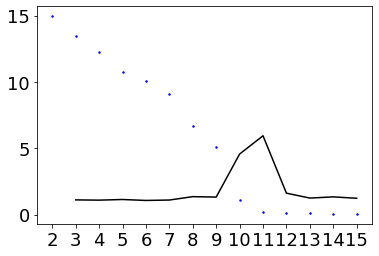

In [18]:
### Importance of dimension correction in higher dimension - Fig.4(B) dimensionality inference
# (TODO: not exactly the same as in the manuscript)


# calculate median heights for tested dimension from start_dim to end_dim
h_meds = []
for hcoll in hcolls:
    h_meds.append(np.median(hcoll))

# calculate the ratio, where h_med_ratios[i] corresponds to h_meds[i-1]/h_meds[i]
# which is the (median height of dim (i-1+start_dim))/(median height of dim (i+start_dim))
h_med_ratios = []
for i in range(1, len(hcolls)):
    print("dim", start_dim+i, "ratio is:", h_meds[i-1]/h_meds[i], h_meds[i-1], h_meds[i])
    h_med_ratios.append(h_meds[i-1]/h_meds[i])

# plot the height scatterplot and the ratios

plt.figure()
plt.scatter(list(range(start_dim, end_dim+1)), h_meds, c ="blue", s=2)
plt.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, c="black")
plt.xticks(np.arange(start_dim, end_dim+1, 1))
plt.show()

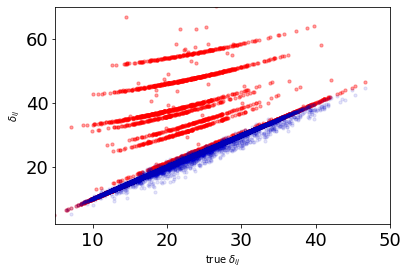

In [19]:
### Importance of dimension correction in higher dimension - Fig.4(C) Shepard Diagram
# (TODO: not exactly the same as in the manuscript)

DSO_flat=DSO.flatten() # [200*200]
D_TRUE_flat=D_TRUE.flatten()
coor_dis_flat=coor_dis.flatten()

plt.figure()
SMALL_SIZE=18
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.scatter(D_TRUE_flat,DSO_flat,color='red',alpha=0.2,s=10)
plt.scatter(D_TRUE_flat,coor_dis_flat,color='mediumblue',alpha=0.05,s=10)

plt.xlabel(r"true $\delta_{ij}$")
plt.ylabel(r'$\delta_{ij}$')
axes = plt.gca()
axes.set_xlim(5,50)
axes.set_ylim(2,70)

plt.show()
